# Ejercicio 1

## a) Exportar un ProfileReport y analizar en él los histogramas de cada variable.
¿Qué se puede decir de la distribución de estos valores? Relacionar con lo
obtenido usando el método describe() de Pandas en el práctico anterior.

In [35]:
import pandas as pd
from os import path
from wget import download
import numpy as np
import matplotlib.pyplot as plt

In [2]:
if not path.exists("ObesityDataSet_raw_and_data_sinthetic.csv"):
    download("https://ignaciorlando.github.io/datasets/data-science/ObesityDataSet_raw_and_data_sinthetic.csv")
else:
    print("Archivo ya descargado.")

Archivo ya descargado.


In [3]:
archivo = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
archivo

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
import pandas_profiling as pp

/tmp/ipykernel_2860/1872674328.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [5]:
reporte = pp.ProfileReport(archivo)


In [6]:
if not path.exists("reporte_Obesity.html"):
    reporte.to_file(output_file="reporte_Obesity.html")
else:
    print("Reporte ya descargado.")

Reporte ya descargado.


### Explicacion del Dataset

**Contexto**: Este dataset colecta informacion de residentes en Mexico, Peru y Colombia sobre su estilo de vida y su salud.

**Gender**: genero de la persona (hombre o mujer).

**Age**: edad de la persona.

**Height**: altura de la persona.

**Weight**: peso de la persona.

**family_history_with_overweight**: Si la persona tuvo o tiene un familiar que sufre de sobre peso (si o no)

**FAVC**: Consumo frecuente de calorias (si o no)

**FCVC**: Consumo frecuente de vegetales (nunca, a veces, siempre)

**NCP**: Numero de comidas principales (1, 2, 3 o 4)

**CAEC**: Consumo de alimentos varios entre comidas principales (no, a veces, frecuentemente, siempre)

**SMOKE**: Es fumador? (si o no)

**CH2O**: Consumo de agua diario (menos de un litro, entre 1 o 2 litros, mas de 2 litros)

**SCC**: Monitoreo de calorias consumidas (si o no)

**FAF**: Frecuencia de actividad fisica (0, 1 a 2, 2 a 4, 4 a 5)

**TUE**: Tiempo usado en dispositivos electronicos (0 a 2, 3 a 5, mas de 5)

**CALC**: Consumo de alcohol (no, a veces, frecuentemente, siempre)

**MTRANS**: Transporte utilizado (automovil, motocicleta, bicicleta, transporte publico, caminata)

**NObeyesdad**: Tipo de obesidad (peso insuficiente, peso normal, sobre peso nivel 1, sobre peso nivel 2, obesidad nivel 1, obesidad nivel 2, obesidad nivel 3)

**BMI**: Indice de masa corporal.

A continuacion se hara el análisis de los histogramas de cada variable.

`Variable AGE`

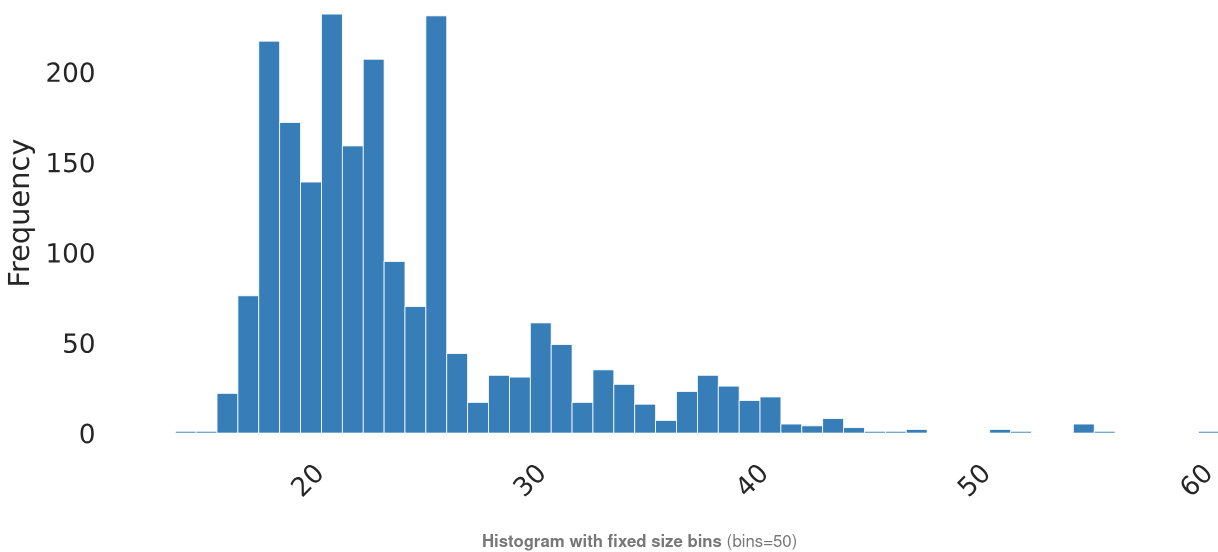

Se puede ver en el histograma que tenemos una distribucion de **EDAD** sesgada a la derecha (sesgo positivo). Teniendo asi un dataset con una muestra etaria concentrada principalmente en valores entre 18 y 27 años aproximadamente.

In [7]:
media = archivo["Age"].mean()
print("Media de edad:", int(media), "años")

Media de edad: 24 años


In [8]:
skewness_coeff = archivo["Age"].skew()
print("Coeficiente de asimetria: ", skewness_coeff)

Coeficiente de asimetria:  1.529100353758853


Con el valor anterior obtenemos que la **EDAD** en nuestro dataset es asimétrica hacia la derecha, significando que los valores extremos de edades se encuentran a la derecha de la media.

In [9]:
kurtosis = archivo["Age"].kurtosis()
print("Kurtosis: ", kurtosis)

Kurtosis:  2.8263890286001767


Al obtener un valor de kurtosis cercano a 3, siendo K=0 el valor para una distribuicion normal, sabemos que nuestra variable tiene una cola pesada, con la mayoria de valores muy cerca de la media pero con una mayor cantidad de valores extremos.

`Variable Gender`



In [10]:
genero = archivo["Gender"]
genero_data = genero.value_counts()
genero_porc = genero.value_counts(normalize=True)*100

print("Genero")
print(f"Hombre: {genero_data['Male']} ({genero_porc['Male']:.2f}%)")
print(f"Mujer: {genero_data['Female']} ({genero_porc['Female']:.2f}%)")


Genero
Hombre: 1068 (50.59%)
Mujer: 1043 (49.41%)


`Variable HEIGHT`

Axes(0.125,0.11;0.775x0.77)


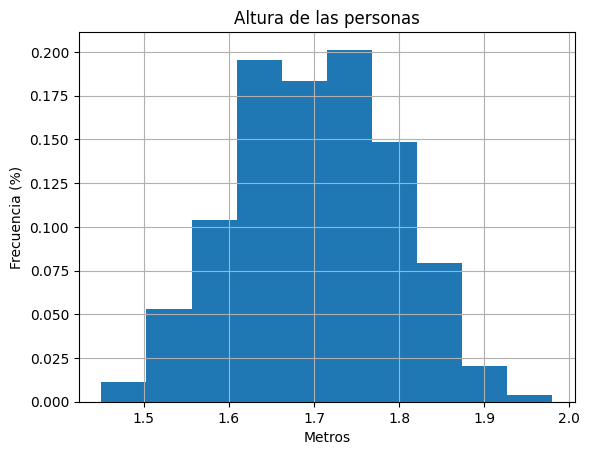

In [34]:
altura_hist = archivo["Height"].hist(weights=np.zeros_like(archivo["Height"]) + 1. / archivo["Height"].size)
altura_hist.set_title("Altura de las personas")
altura_hist.set_xlabel("Metros")
altura_hist.
altura_hist.set_ylabel("Frecuencia (%)")
print(altura_hist)

In [12]:
altura = archivo["Height"]
altura_promedio = altura.mean()
altura_skew = altura.skew()
altura_kurtosis = altura.kurtosis()

print("Datos de altura de población")
print(f"Promedio: {altura_promedio:.2f} metros")
print(f"Coeficiente de asimetria: {altura_skew:.2f}")
print(f"Kurtosis: {altura_kurtosis:.2f}")

Datos de altura de población
Promedio: 1.70 metros
Coeficiente de asimetria: -0.01
Kurtosis: -0.56


Segun los datos podemos observar que nuestra variable de altura tiene un muy pequeño sesgo a la izquierda, pero es un valor muy cercano al cero, por lo que puede no tenerse en cuenta y sostener que es una distribucion simétrica. Lo mismo ocurre con la kurtosis, donde tenemos un valor negativo pero cercano al cero entonces podemos afirmar que tiene una distribucion de "cola ligera" pero muy cercana a una distribucion normal.

`Variable Weight`

Axes(0.125,0.11;0.775x0.77)


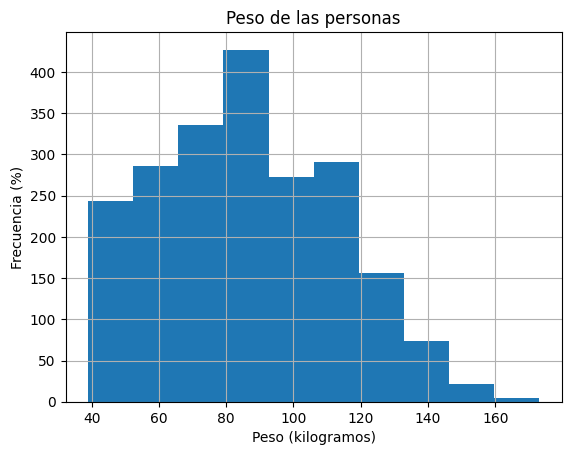

<Figure size 500x500 with 0 Axes>

In [38]:
peso = archivo["Weight"]
peso_hist = peso.hist()
peso_hist.set_title("Peso de las personas")
peso_hist.set_xlabel("Peso (kilogramos)")
peso_hist.set_ylabel("Frecuencia (%)")
print(peso_hist)
plt.figure(figsize=(5,5))
plt.show()

`Variable family_history_with_overweight`

Axes(0.125,0.11;0.775x0.77)


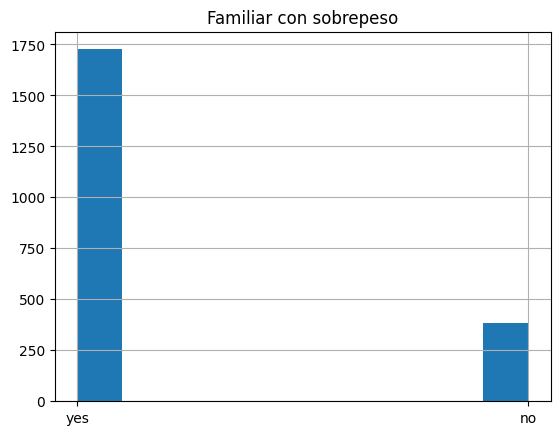

In [16]:
historia_familiar = archivo["family_history_with_overweight"]
historia_familiar_hist = historia_familiar.hist()
historia_familiar_hist.set_title("Familiar con sobrepeso")
print(historia_familiar_hist)

`Variable FAVC`

Axes(0.125,0.11;0.775x0.77)


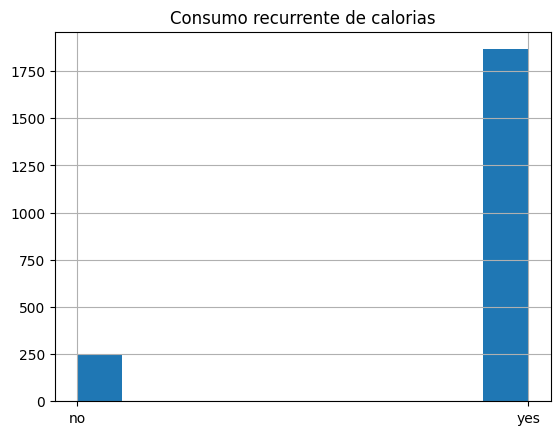

In [36]:
consumo_calorias = archivo["FAVC"]
consumo_calorias_hist = consumo_calorias.hist()
consumo_calorias_hist.set_title("Consumo frecuente de calorias")
print(consumo_calorias_hist)

`Variable FCVC`

Axes(0.125,0.11;0.775x0.77)


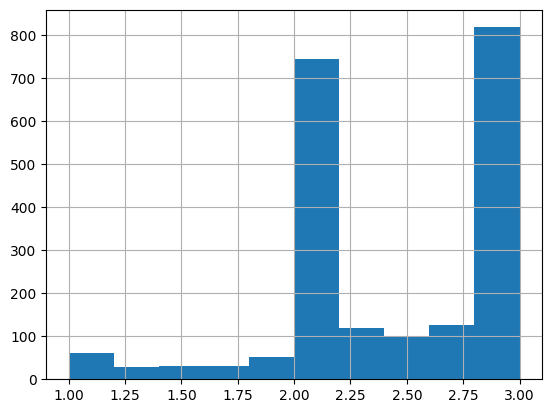

In [37]:
consumo_vegetales = archivo["FCVC"]
consumo_vegetales_hist = consumo_vegetales.hist()
print(consumo_vegetales_hist)

`Variable CALC`

`Variable NCP`

`Variable SCC`

`Variable SMOKE`

`Variable CH20`

`Variable FAF`

`Variable TUE`

`Variable CAEC`

`Variable MTRANS`

`Variable NOBeyesdad`